In [120]:
import math
import copy

In [148]:
# return element counts of none zero
def count_nonezero(A):
    c = 0
    for i in A:
        if i==True or i!=0:
            c += 1
    return c
# return the dimension of a matrix or a tensor
def dim(A):
    assert(type(A)==list)
    d = 0
    B = A
    while(type(B)==list and len(B)!=0):
        d += 1
        B = B[0]
    return d
# return the shape of a matrix or a tensor 
def shape(A):
    assert(type(A)==list)
    B = A
    s = []
    while(type(B)==list and len(B)!=0):
        s.append(len(B))
        B = B[0]
    return tuple(s)
# return a tensor of shape s fill with 0
def zeros(s,dtype=float):
    if type(s)==int:
        return [0 for _ in range(s)]
    elif type(s) == tuple and len(s)==1:
        return [0 for _ in range(s[0])]
    else:
        import copy
        r = zeros(s[1:],dtype=dtype)
        R = []
        for i in range(s[0]):
            R.append(copy.deepcopy(r))
    return R


# ---------------------matrix function----------------------
# columns slicing of matrix A
def col(A,i):
    assert(dim(A)==2)
    m,n = shape(A)
    return [A[k][i] for k in range(m)]


# ---------------------vector funciton----------------------
def mean(A):
    assert(dim(A)==1)
    length = len(A)
    _sum = 0
    for i in range(len(A)):
        _sum+=A[i]
    return _sum/float(length)
def sqrt(A):
    assert(dim(A)==1)
    return [x **2 for x in A]
def minus(A,B):
    assert(dim(A)==1 and dim(B)==1 and shape(A)==shape(B))
    return [A[i] - B[i] for i in range(len(A))]
def plus(A,B):
    assert(dim(A)==1 and dim(B)==1 and shape(A)==shape(B))
    return [A[i] + B[i] for i in range(len(A))]
def root(A):
    assert(type(A)==list or type(A)==float or type(A)==int)
    if type(A)==list:
        assert(dim(A)==1)
        return [math.pow(x,0.5) for x in A]
    elif type(A)==float or type(A)==int :
        assert(A>=0)
        return math.pow(A,0.5)
    assert(a>=0)
def multiply(A,B):
    assert(dim(A)==1 and dim(B)==1 and shape(A)==shape(B))
    return [A[i] * B[i] for i in range(len(A))]
# -------------------------end--------------------------------

In [123]:
count_nonezero([1,1,1,0,0,1,0])

4

In [124]:
count_nonezero([True,1,1,True,0,1,0])

5

In [125]:
dim([[[1,2]]])

3

In [126]:
shape([[1,2,3]])

(1, 3)

In [127]:
zeros((3,4,1))

[[[0], [0], [0], [0]], [[0], [0], [0], [0]], [[0], [0], [0], [0]]]

In [128]:
A = [[1,2,3],[4,5,6],[1.2,2.2,4.3]]

In [129]:
import numpy as np

In [130]:
np.power(col(A,1),2)

array([  4.  ,  25.  ,   4.84])

In [131]:
np.sqrt(col(A,1))

array([ 1.41421356,  2.23606798,  1.4832397 ])

In [132]:
sqrt(col(A,1))

[4, 25, 4.840000000000001]

In [133]:
np.sqrt(plus(A[1],A[0]))

array([ 2.23606798,  2.64575131,  3.        ])

In [134]:
root(plus(A[1],A[0]))

[2.23606797749979, 2.6457513110645907, 3.0]

In [135]:
A = [1,2,3]
B = [0.9,5.2,1.4]

In [136]:
multiply(A,B)

[0.9, 10.4, 4.199999999999999]

In [137]:
np.array(A) * np.array(B)

array([  0.9,  10.4,   4.2])

In [138]:
import pandas as pd
import numpy as np

In [139]:
def _corr(A,i,j):
    assert(dim(A)==2)
    m,n = shape(A)

    X,Y = col(A,i),col(A,j)
    mean_X,mean_Y = mean(X),mean(Y)
    X_ = [k-mean_X for k in X]
    Y_ = [k-mean_Y for k in Y]
    numerator = mean(multiply(X_,Y_))
    denominator = root(mean(squrt(X_)))*root(mean(squrt(Y_)))
    r = (numerator)/(denominator)
    return r

In [140]:
A = [[1,3,3],[4.2,6,7],[1.2,2.2,4.3]]

In [141]:
shape(A)

(3, 3)

In [142]:
pd.DataFrame(A).corr()

,0,1,2
0,1.000000,0.967199,0.964197
1,0.967199,1.000000,0.865209
2,0.964197,0.865209,1.000000


In [143]:
_corr(A,0,2)

0.9641973456196753

In [149]:
def correlation(A):
    assert(dim(A)==2)
    m,n = shape(A)
    global R
    R = zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i==j:
                R[i][j] = 1
            elif i>j:
                R[i][j] = R[j][i]
            else:
                R[i][j] = _corr(A,i,j)
    return R

In [150]:
correlation(A)

[[1, 0.9671992666259174, 0.9641973456196753],
 [0.9671992666259174, 1, 0.8652087866005586],
 [0.9641973456196753, 0.8652087866005586, 1]]

In [151]:
_corr(A,2,2)

1.0

In [152]:
b = '14d'

In [155]:
b[:-1]

'14'

In [157]:
[1,2,3,8,6]

[1, 2, 3, 8, 6]

In [158]:
sorted([1,2,3,8,6])

[1, 2, 3, 6, 8]

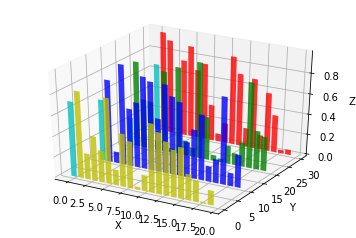

In [160]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()